In [1]:
%gui qt5
from aicsimageio import AICSImage, imread
import numpy as np
import napari

import matplotlib.pyplot as plt

In [12]:
# Offset correction
def returnOffsetCorr(movie):
    if np.min(movie)<0:
        movie = movie - np.min(movie)
    return movie


In [3]:
# Change output figure size
# ...needs to be in its own cell for some reason...

plt.rcParams['figure.figsize'] = [16, 10]

In [13]:
image = imread('neuron-1 stack_00001.tif')
print(image.shape)
image = image[0,0,0,:,:,:]
print(image.shape)

corrected_image = returnOffsetCorr(image)

(1, 1, 1, 100, 512, 512)
(100, 512, 512)


In [14]:
test = napari.Viewer()
test.add_image(corrected_image, name='Ch1', scale=(5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch1' at 0x7fa128a055c0>

In [6]:
ch1= np.zeros((int(image.shape[0]/2),512,512))
ch1_count=0
ch2= np.zeros((int(image.shape[0]/2),512,512))
ch2_count=0

for i in range(image.shape[0]):
    if i%2 == 0:
        ch1[ch1_count, :, :] = image[i, :, :]
        ch1_count+=1
    else:
        ch2[ch2_count, :, :] = image[i, :, :]
        ch2_count+=1
    

In [7]:
ch1 = returnOffsetCorr(ch1)
ch2 = returnOffsetCorr(ch2)

In [8]:
test = napari.Viewer()
test.add_image(ch1, name='Ch1', scale=(2.5, 1, 1), colormap='red', blending='additive')
test.add_image(ch2, name='Ch2', scale=(2.5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch2' at 0x7fa1291fc6d8>

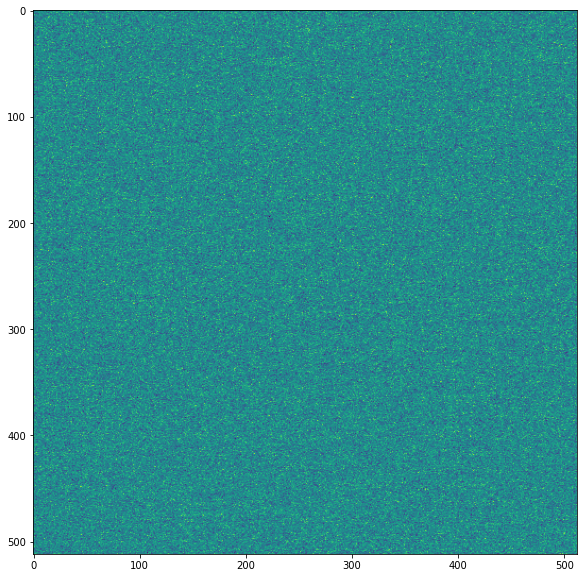

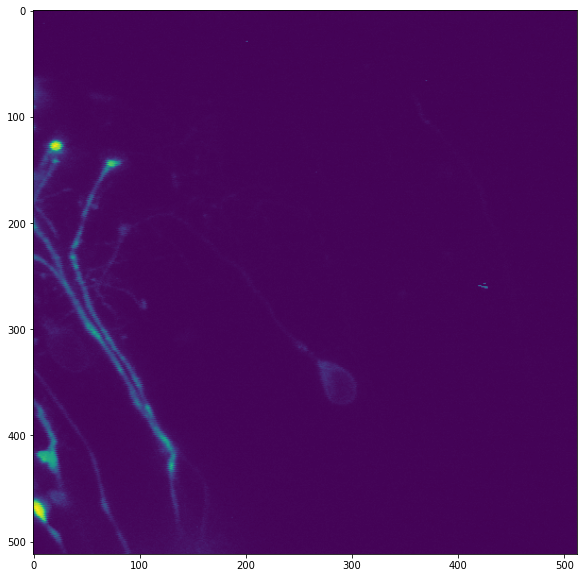

In [11]:
plt.imshow(np.std(ch1, axis=0))
plt.show()
plt.imshow(np.std(ch2, axis=0))
plt.show()